# Correlation Between Latitude and Weather
----

![Equator](Images/equatorsign.png)

---

The purpose of the study is to visualize the weather of 500+ cities across the world of varying distance from the equator and to demonstrate a correlation between latitude and weather.

#### Correlation Between Temperature and Latitude

Maximum temperature point decreases directly with an increase in the distance away from the equator on both hemispheres.

#### Correlation Between Humidity and Latitude

There is no correlation between humidity levels and latitude on the Northern Hemisphere. Northern Hemisphere has a wide range of humidity levels, between 10% and 100%, independent of a latitude. However, Southern Hemisphere has high humidity levels, 60% - 100%, right next to the equator, but going farther south, away from the equator, humidity levels very widely, 20% - 100%, independent of a latitude. 

#### Correlation Between Latitude and Cloudiness and Wind Speed

There is no correlation between cloudiness and latitude on both hemispheres. Majority of cities have winds with varying speed levels, between 0 mph – 20 mph, independent of a latitude on both hemispheres. Only insignificant number of cities far North from the equator have winds with speed levels above 20 mph.

---

## WeatherPy

In [2]:
# Dependencies and setup:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
%matplotlib inline

# Import API key:
from api_keys import weather_api_key1

# Incorporated citipy to determine city based on latitude and longitude:
from citipy import citipy

# Output file (CSV):
output_data_file='output_data/cities.csv'

# Range of latitudes and longitudes:
lat_range=(-90, 90)
lng_range=(-180, 180)

## Random Cities List

In [63]:
# List for holding lat_lngs and cities:
lat_lngs=[]
cities=[]

# Create a set of random lat and lng combinations:
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats, lngs)

# Identify nearest city for each lat, lng combination:
for lat_lng in lat_lngs:
    city=citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list:
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient amount:
len(cities)

622

In [64]:
# Save config information:
url='http://api.openweathermap.org/data/2.5/weather?'
units='imperial'

# Build partial query URL:
query_url=f'{url}appid={weather_api_key1}&units={units}&q='

In [65]:
# Set up lists to hold response info:
name=[]         # list for city name
cloud=[]        # list for cloudines
ctry=[]         # list for country
date=[]         # list for date
humi=[]         # list for humidity
lat=[]          # list for latitude
lng=[]          # list for longitude
maxtemp=[]      # list for max temperature
wind=[]         # list for wind speed

# Loop through the list of cities and perform a request for data on each and add data to corresponding lists:

count=1 # Set counter to start value 1 for printouts of the current set count.

print('Beginning Data Retrieval')     
print('-----------------------------')
for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:                                                # Ignore errors in response.
            name.append(response['name'])
            cloud.append(response['clouds']['all'])
            ctry.append(response['sys']['country'])
            date.append(response['dt'])
            humi.append(response['main']['humidity'])             
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])             
            maxtemp.append(response['main']['temp_max'])
            wind.append(response['wind']['speed'])     
        except KeyError:
            
            print(city + ' city not found. Skipping...') # In case one of the responses comes back with error "KeyError"
                                                            # which could be the city or one of the data points missing.    
        count=count+1


Beginning Data Retrieval
-----------------------------
Processing Record 1 of 622 | ushuaia
Processing Record 2 of 622 | ardatov
Processing Record 3 of 622 | puerto ayora
Processing Record 4 of 622 | chichihualco
Processing Record 5 of 622 | luganville
Processing Record 6 of 622 | belushya guba
belushya guba city not found. Skipping...
Processing Record 7 of 622 | hermanus
Processing Record 8 of 622 | port alfred
Processing Record 9 of 622 | lebu
Processing Record 10 of 622 | dongsheng
Processing Record 11 of 622 | taolanaro
taolanaro city not found. Skipping...
Processing Record 12 of 622 | padang
Processing Record 13 of 622 | yellowknife
Processing Record 14 of 622 | tuktoyaktuk
Processing Record 15 of 622 | busselton
Processing Record 16 of 622 | puertollano
Processing Record 17 of 622 | bredasdorp
Processing Record 18 of 622 | dhidhdhoo
Processing Record 19 of 622 | teguise
Processing Record 20 of 622 | attawapiskat
attawapiskat city not found. Skipping...
Processing Record 21 of 6

Processing Record 184 of 622 | komsomolskiy
Processing Record 185 of 622 | samusu
samusu city not found. Skipping...
Processing Record 186 of 622 | dunedin
Processing Record 187 of 622 | grand-santi
Processing Record 188 of 622 | kaoma
Processing Record 189 of 622 | muhos
Processing Record 190 of 622 | ostrovnoy
Processing Record 191 of 622 | muli
Processing Record 192 of 622 | caranavi
Processing Record 193 of 622 | ancud
Processing Record 194 of 622 | dawlatabad
Processing Record 195 of 622 | saint-augustin
Processing Record 196 of 622 | georgetown
Processing Record 197 of 622 | bambanglipuro
Processing Record 198 of 622 | huarmey
Processing Record 199 of 622 | makakilo city
Processing Record 200 of 622 | meulaboh
Processing Record 201 of 622 | kruisfontein
Processing Record 202 of 622 | halifax
Processing Record 203 of 622 | itarema
Processing Record 204 of 622 | moju
Processing Record 205 of 622 | cidreira
Processing Record 206 of 622 | gasa
Processing Record 207 of 622 | kavieng
P

Processing Record 372 of 622 | waingapu
Processing Record 373 of 622 | leh
Processing Record 374 of 622 | akdepe
Processing Record 375 of 622 | korla
Processing Record 376 of 622 | meriden
Processing Record 377 of 622 | victoria point
Processing Record 378 of 622 | kinkala
Processing Record 379 of 622 | marcona
marcona city not found. Skipping...
Processing Record 380 of 622 | mugumu
Processing Record 381 of 622 | gravdal
Processing Record 382 of 622 | ajaccio
Processing Record 383 of 622 | nhulunbuy
Processing Record 384 of 622 | meyungs
meyungs city not found. Skipping...
Processing Record 385 of 622 | emerald
Processing Record 386 of 622 | shangrao
Processing Record 387 of 622 | ratnagiri
Processing Record 388 of 622 | tabiauea
tabiauea city not found. Skipping...
Processing Record 389 of 622 | am timan
Processing Record 390 of 622 | kajaani
Processing Record 391 of 622 | egvekinot
Processing Record 392 of 622 | birao
Processing Record 393 of 622 | naze
Processing Record 394 of 622 

Processing Record 566 of 622 | hovd
Processing Record 567 of 622 | lasa
Processing Record 568 of 622 | garowe
Processing Record 569 of 622 | laguna
Processing Record 570 of 622 | panama city
Processing Record 571 of 622 | nizhniy odes
Processing Record 572 of 622 | mount gambier
Processing Record 573 of 622 | saint-joseph
Processing Record 574 of 622 | beruni
beruni city not found. Skipping...
Processing Record 575 of 622 | lasem
Processing Record 576 of 622 | nguiu
nguiu city not found. Skipping...
Processing Record 577 of 622 | tignere
Processing Record 578 of 622 | hamadan
Processing Record 579 of 622 | san jose de ocoa
Processing Record 580 of 622 | jasper
Processing Record 581 of 622 | prince rupert
Processing Record 582 of 622 | mehamn
Processing Record 583 of 622 | hualmay
Processing Record 584 of 622 | borger
Processing Record 585 of 622 | sorong
Processing Record 586 of 622 | batavia
Processing Record 587 of 622 | bagotville
Processing Record 588 of 622 | walvis bay
Processing

In [66]:
# Create a data frame from api call list:
weather_dict = {
    'City': name,
    'Country': ctry,
    'Date': date,
    'Lat': lat,
    'Lng': lng,
    'Cloudiness (%)': cloud,
    'Humidity (%)': humi,
    'Max Temp (F)': maxtemp,
    'Wind Speed (mph)': wind
}

weather_data=pd.DataFrame(weather_dict)

# Test/clean data:
weather_data.isnull().sum()
weather_data.dropna() 
weather_data.count()

City                566
Country             566
Date                566
Lat                 566
Lng                 566
Cloudiness (%)      566
Humidity (%)        566
Max Temp (F)        566
Wind Speed (mph)    566
dtype: int64

In [67]:
# Export the weather_data into .csv file path specified with output_data_file:
weather_data.to_csv(output_data_file, index=False)

# Display the data frame:
weather_data.head()

,City,Country,Date,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Ushuaia,AR,1586644613,-54.80,-68.30,40,80,41.00,23.04
1,Ardatov,RU,1586644688,55.24,43.10,100,82,32.54,13.78
2,Puerto Ayora,EC,1586644688,-0.74,-90.35,40,70,84.20,9.17
3,Chichihualco,MX,1586644688,17.68,-99.65,32,18,85.15,6.38
4,Luganville,VU,1586644688,-15.53,167.17,40,69,82.40,6.93


---

## Plotting the Data

 The following scatter plots demonstrate relationship between latitude and temperature, humidity, cloudiness, and wind speed for all randomly selected cities.

In [3]:
# Load csv file so querry does not need to run every time for the below plots:
file_to_load='output_data/cities.csv' # csv file created from the extracted data above. 

# Read csv file and store it into data frame:
weather_data=pd.read_csv(file_to_load)

weather_data.count()
weather_data.isnull().sum()
weather_data.dropna()
weather_data.head()

,City,Country,Date,Lat,Lng,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Ushuaia,AR,1586644613,-54.80,-68.30,40,80,41.00,23.04
1,Ardatov,RU,1586644688,55.24,43.10,100,82,32.54,13.78
2,Puerto Ayora,EC,1586644688,-0.74,-90.35,40,70,84.20,9.17
3,Chichihualco,MX,1586644688,17.68,-99.65,32,18,85.15,6.38
4,Luganville,VU,1586644688,-15.53,167.17,40,69,82.40,6.93


### Latitude vs. Temperature Plot

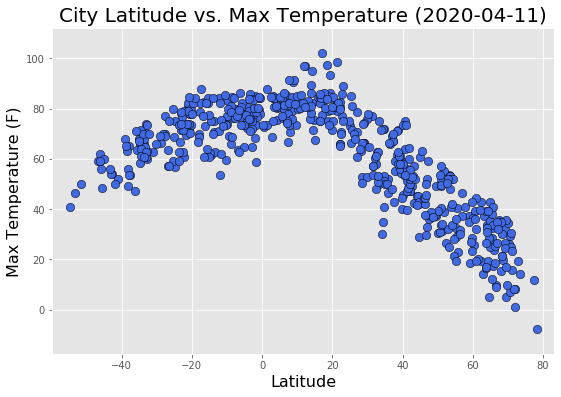

In [83]:
# Build a scatter plot for all cities vs max. temp.:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['Lat'], weather_data['Max Temp (F)'], marker='o', edgecolors='black', color='royalblue',  s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y axis:
plt.ylim(min(weather_data['Max Temp (F)'])-10, max(weather_data['Max Temp (F)'])+10)

# Set the limits of the x axis:
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure:
plt.savefig('output_data/City Latitude vs. MaxTemp.png')

# Show plot:
plt.show()

This plot demonstrates maximum temperature changes for different cities depending on their distance away from the equator towards North and South. The plot demonstrates a strong correlation between temperature and latitude on both hemispheres.   

---

### Latitude vs. Humidity Plot

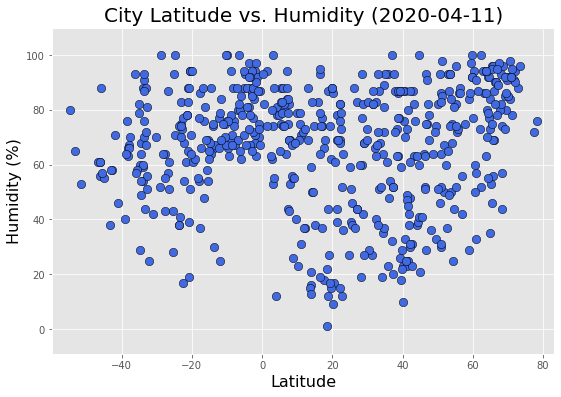

In [85]:
# Build a scatter plot for all cities vs humidity level:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['Lat'], weather_data['Humidity (%)'], marker='o', edgecolors='black', color='royalblue',  s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Humidity ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y axis:
plt.ylim(min(weather_data['Humidity (%)'])-10, max(weather_data['Humidity (%)'])+10)

# Set the limits of the x axis:
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure:
plt.savefig('output_data/City Latitude vs. Humidity.png')

# Show plot:
plt.show()

This plot demonstrates no correlation between humidity levels and latitude on the Northern Hemisphere and most of the Southern Hemisphere, however, it shows high levels of humidity next to the equator. 

---

### Latitude vs. Cloudiness Plot

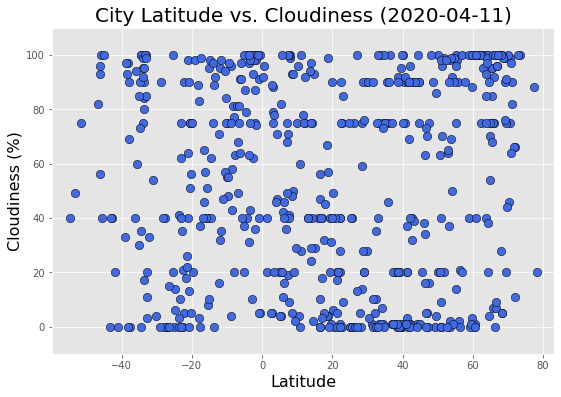

In [94]:
# Build a scatter plot for all cities vs cloudiness level:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['Lat'], weather_data['Cloudiness (%)'], marker='o', edgecolors='black', color='royalblue',  s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Cloudiness ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y axis:
plt.ylim(min(weather_data['Cloudiness (%)'])-10, max(weather_data['Cloudiness (%)'])+10)

# Set the limits of the x axis:
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure
plt.savefig('output_data/City Latitude vs. Cloudiness.png')

# Show plot
plt.show()

The above plot demonstrates no correlation between cloudiness and latitude.   

---

### Latitude vs. Wind Speed Plot

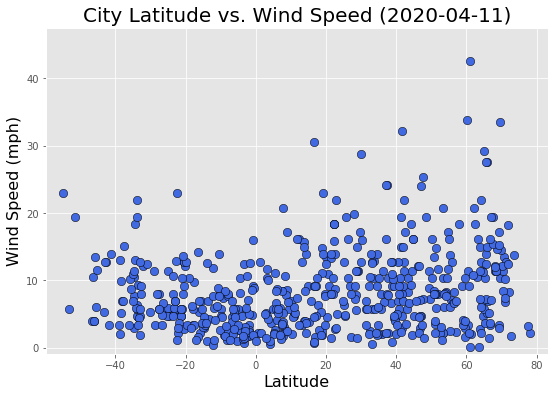

In [96]:
# Build a scatter plot for all cities vs wind speed:
plt.figure(figsize=(9,6))
plt.scatter(weather_data['Lat'], weather_data['Wind Speed (mph)'], marker='o', edgecolors='black', color='royalblue',  s=[70])

# Incorporate the other graph properties:
plt.title('City Latitude vs. Wind Speed ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')

# Set the limits of the y axis:
plt.ylim(min(weather_data['Wind Speed (mph)'])-1, max(weather_data['Wind Speed (mph)'])+5)

# Set the limits of the x axis:
plt.xlim(min(weather_data['Lat'])-5, max(weather_data['Lat'])+5)

# Save the figure
plt.savefig('output_data/City Latitude vs. Wind.png')

# Show plot
plt.show()

This plot demonstrates little to no correlation between wind speed and latitude on both hemispheres.   

---

## Linear Regression

In [5]:
# Create new data frame for northern hemisphere (lat >= 0 degree):
weather_data_north = weather_data[weather_data['Lat'] >= 0]

#weather_data_north.count()

# Create new data frame for southern hemisphere (lat < 0 degree):
weather_data_south = weather_data[weather_data['Lat'] < 0]

#weather_data_south.count()

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

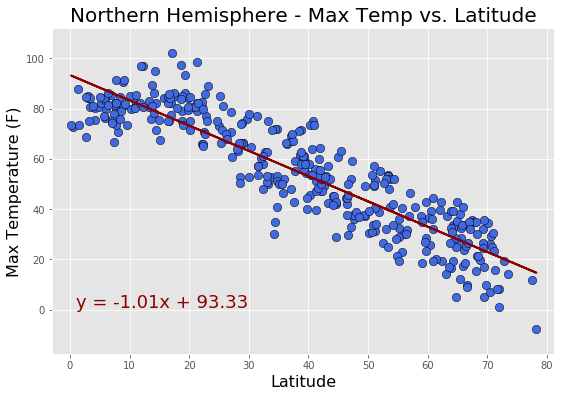

In [55]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Max Temp (F)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(min(weather_data['Max Temp (F)'])-10, max(weather_data['Max Temp (F)'])+10)

# Set the limits of the x axis:
plt.xlim(-3, max(weather_data['Lat'])+3)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. MaxTemp_North.png')

# Show plot:
plt.show()

###### The r - squared is: 0.83

There is a strong negative correlation between latitude and maximum temperature on the Northern Hemisphere. The farther north from equator is a position of a city the lower is its maximum temperature.

---

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

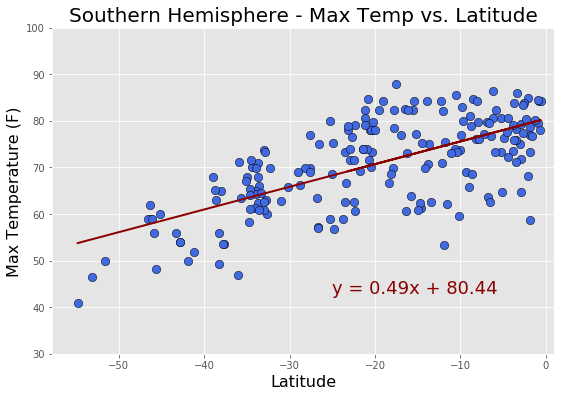

In [52]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Max Temp (F)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-25,43),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(30, 100)

# Set the limits of the x axis:
plt.xlim(min(weather_data['Lat'])-3, +1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. MaxTemp_South.png')

# Show plot:
plt.show()

###### The r - squared is: 0.46

There is a positive correlation between maximum temperature and a latitude on the Southern Hemisphere. The closer to the equator is a city position the higher is its maximum temperature. The variance of the maximum temperature on the Southern Hemisphere is higher than on the Northern Hemisphere and there is a broader maximum temperature variation for different cities positioned on the same latitude.   

---

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

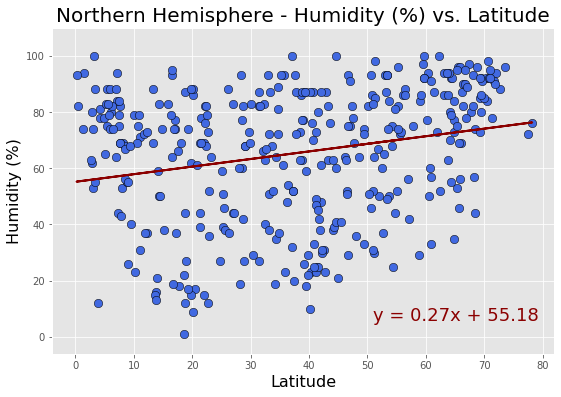

In [51]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Humidity (%)']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-6, 110)

# Set the limits of the x axis:
plt.xlim(-4, 82)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Humidity_North.png')

# Show plot:
plt.show()

###### The r - squared is: 0.06

There is almost no correlation between humidity level and city position moving north from equator. 

---

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

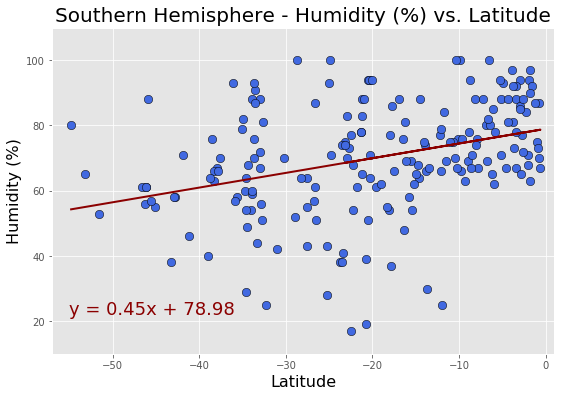

In [46]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Humidity (%)']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-55,22), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(10, 110)

# Set the limits of the x axis:
plt.xlim(-57, 1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Humidity_South.png')

# Show plot:
plt.show()

###### The r - squared is: 0.13

There is almost no correlating between humidity levels and a city position on the Southern Hemisphere. Higher levels of humidity are observed close to the equator, however, the further south from equator the broader is a humidity level range for the same altitudes.  

---

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

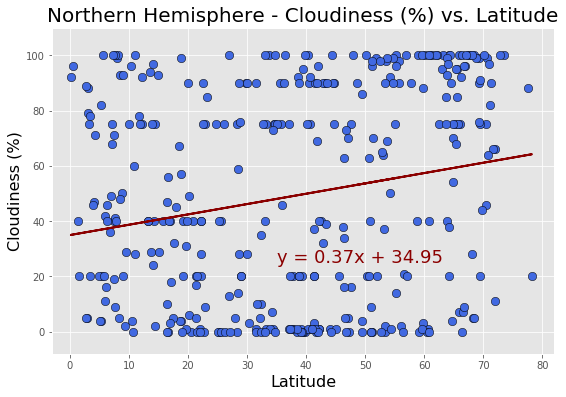

In [45]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Cloudiness (%)']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-8, 110)

# Set the limits of the x axis:
plt.xlim(-3, 82)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Cloudiness_North.png')

# Show plot:
plt.show()

###### The r - squared is: 0.04

There is no correlation between cloudiness and a distance from the equator for the cities’ positions. Cloudiness levels are widely spread across all latitudes along the whole Northern Hemisphere. 

---

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

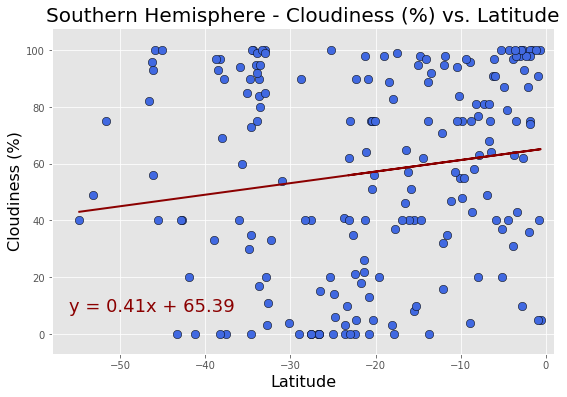

In [44]:
# build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Cloudiness (%)']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-56,8), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-7, 108)

# Set the limits of the x axis:
plt.xlim(-58, 1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Cloudiness_South.png')

# Show plot:
plt.show()

###### The r - squared is: 0.02

There is no correlation between the cloudiness level and a latitude on the Southern Hemisphere. The level of cloudiness is ranging from 0% to 100% independent of a latitude.

---

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

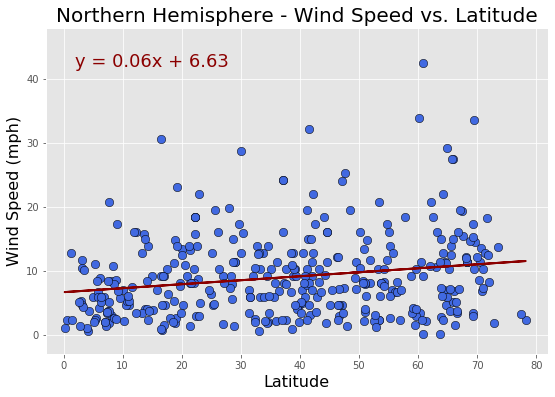

In [41]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Wind Speed (mph)']

# Perform a linear regression for wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(2,42), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-3, 48)

# Set the limits of the x axis:
plt.xlim(-3, 82)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Wind_North.png')

# Show plot:
plt.show()

###### The r - squared is: 0.04

There is very low correlation between the wind speed and a latitude on the Northern Hemisphere. Majority of cities have winds with variable speed levels ranging between 0 mph and 20 mph along the whole Northern Hemisphere.

---

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

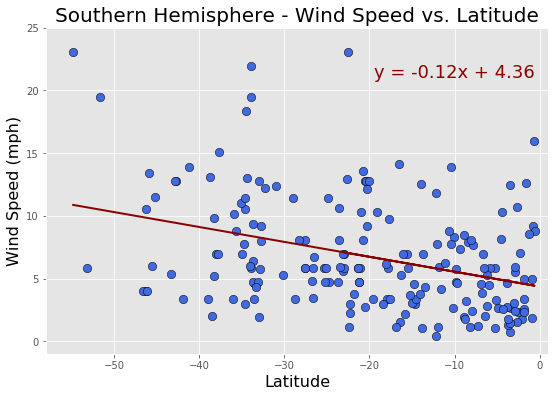

In [59]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Wind Speed (mph)']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-19.5,21), fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-1, 25)

# Set the limits of the x axis:
plt.xlim(-58, 1)

# Print r-squared value:
#print(f'The r-squared is: {round(rvalue**2,2)}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Wind_South.png')

# Show plot:
plt.show()

###### The r - squared is: 0.13 

There is a very low negative correlation between a wind speed and a latitude on the Southern Hemisphere. The wind speed lightly increases going farther south away from the equator.

---